## Analyse Nutzung
Überblick über die Nutzungsart der Gebäude

In [12]:
import pandas as pd
import dataset.charts as charts
import dataset.importer as im
import seaborn as sns
import matplotlib.pyplot as plt

df = im.get_dataset('dataset/dataset.csv')
pd.set_option('display.max_rows', 500) # to show all value_counts


#### Verteilung im Datenset


In [2]:
df[im.FIELD_USAGE_CLUSTER].value_counts()

WOHNEN           244
SCHULEN          163
HALLEN            88
BUERO             86
BETRIEB           61
BEHERBERGUNG      56
KULTUS_KULTUR     26
GESUNDHEIT        24
ANDERES           14
TECHNIK            8
OFFENE_BAUTEN      8
IRRELEVANT         7
AUSSENANLAGEN      1
Name: usage_cluster, dtype: int64

In [10]:
df[im.FIELD_NOM_USAGE_MAIN].value_counts()


SCHULEN
WOHNEN
GESUNDHEIT
HALLEN
BEHERBERGUNG
KULTUS_KULTUR
BUERO
BETRIEB
OFFENE_BAUTEN
ANDERES
TECHNIK
IRRELEVANT
AUSSENANLAGEN


## Nutzungen kombinieren
Der Datensatz enthält sehr unterschiedliche Datenmengen pro Nutzungstyp. Wenn zu wenig Daten vorhanden sind, macht das Verwenden des Felds 'usage_cluster' oder weiteres Zusammenfassen Sinn. Für Nutzungstypen mit vielen Daten (Wohnen, Schulen etc.) macht es Sinn, ein spezifischeren Typ zu verwenden.

**Mehrfamilienhäuser**<br>
WOHNBAUTEN__MFH_MEDIUM<br>
WOHNBAUTEN__MFH_LOW<br>
WOHNBAUTEN__MFH_HIGH<br>

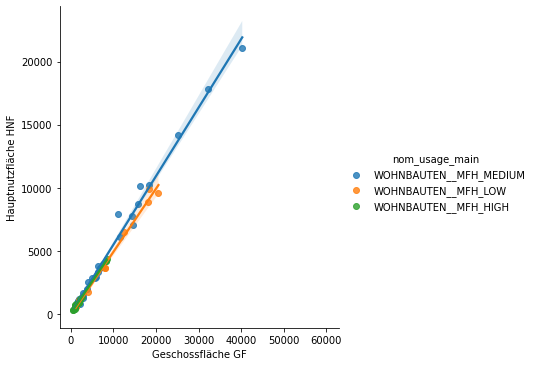

In [4]:
types_wohnen_mfh = ['WOHNBAUTEN__MFH_HIGH', 'WOHNBAUTEN__MFH_MEDIUM','WOHNBAUTEN__MFH_LOW']
mfh_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_wohnen_mfh)]

charts.lmplot_gf_hnf(mfh_df, hue=im.FIELD_NOM_USAGE_MAIN)

**Einfamilienhäuser**<br>
WOHNBAUTEN__EFH_REIHEN_LOW<br>
WOHNBAUTEN__EFH_REIHEN_MEDIUM<br>
WOHNBAUTEN__EFH_REIHEN_HIGH

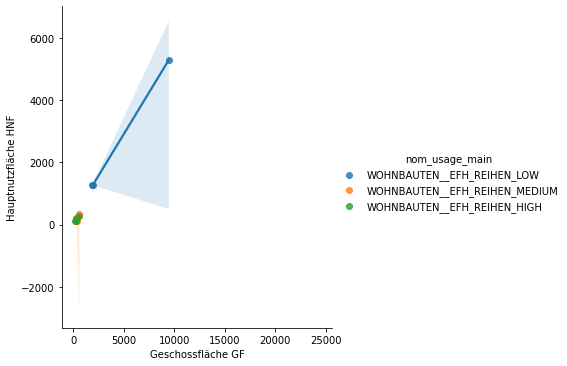

In [5]:
types_wohnen_efh = ['WOHNBAUTEN__EFH_REIHEN_LOW', 'WOHNBAUTEN__EFH_REIHEN_MEDIUM','WOHNBAUTEN__EFH_REIHEN_HIGH']
efh_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_wohnen_efh)]

charts.lmplot_gf_hnf(efh_df, hue=im.FIELD_NOM_USAGE_MAIN)

**Schulen sinnvoll aufteilen?**<br>
SCHULBAUTEN__VOLKSSCHULEN<br>
SCHULBAUTEN__KINDERGAERTEN_HORTE<br>
SCHULBAUTEN__BERUFSSCHULEN<br>
SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN<br>
SCHULBAUTEN__FORSCHUNGSBAUTEN_MIT_LABOR<br>
SCHULBAUTEN__BIBLIOTHEKEN<br>
SCHULBAUTEN__FORSCHUNGSBAUTEN_OHNE_LABOR<br>
SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN<br>

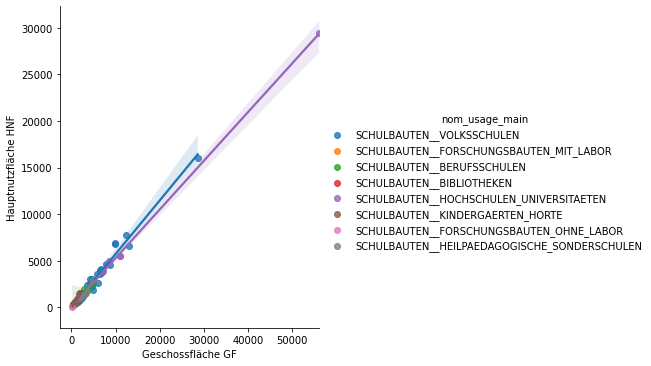

In [7]:
types_schulen = ['SCHULBAUTEN__VOLKSSCHULEN',
                    'SCHULBAUTEN__KINDERGAERTEN_HORTE',
                    'SCHULBAUTEN__BERUFSSCHULEN',
                    'SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN',
                    'SCHULBAUTEN__FORSCHUNGSBAUTEN_MIT_LABOR',
                    'SCHULBAUTEN__BIBLIOTHEKEN',
                    'SCHULBAUTEN__FORSCHUNGSBAUTEN_OHNE_LABOR',
                    'SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN'
                    ]
schulen_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_schulen)]

charts.lmplot_gf_hnf(schulen_df, hue=im.FIELD_NOM_USAGE_MAIN)

**Rest**<br>
Vermutlich vorerst auf Usage Cluster zurückgreifen.

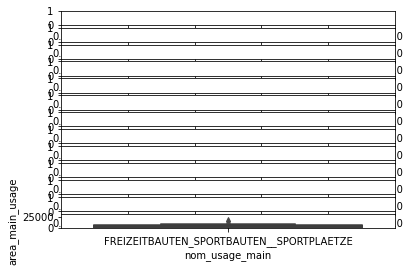

In [15]:
usage_clusters = df[im.FIELD_USAGE_CLUSTER].unique()
figure, axes = plt.subplots(usage_clusters.size, 1)
for i in usage_clusters:
    usageDf = df[df[im.FIELD_USAGE_CLUSTER] == i]
    sns.boxplot(x=im.FIELD_NOM_USAGE_MAIN, y=im.FIELD_AREA_MAIN_USAGE, data=usageDf)
plt.show()

